# Analisa Korelasi Variabel 

Setelah menjawab kondisi-kondisi yang lebih mungkin memiliki tagihan kesehatan yang tinggi
dari langkah sebelumnya. Kita juga dapat mencari keterhubungan antara kondisi-kondisi
tersebut dengan tagihan kesehatan.

In [1]:
import pandas as pd
import numpy as np
from numpy import cov
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [2]:
def load_data_insurance():
    data_insurance = pd.read_csv("insurance.csv")
    data_insurance = data_insurance.assign(bmi_category=pd.cut(data_insurance['bmi'], 
                               bins=[0, 25, 60], 
                               labels=['normal', 'over']))
    data_insurance = data_insurance.assign(charges_category=pd.cut(data_insurance['charges'], 
                               bins=[0, 16_700, 65_000], 
                               labels=['normal', 'high']))
    return data_insurance

In [3]:
data_insurance = load_data_insurance()
data_smoker = data_insurance.query('smoker=="yes"')
data_non_smoker = data_insurance.query('smoker=="no"')

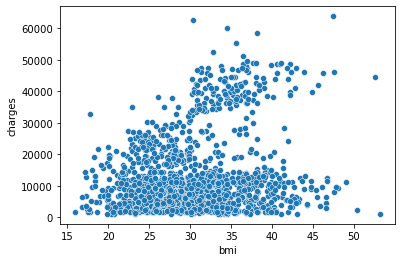

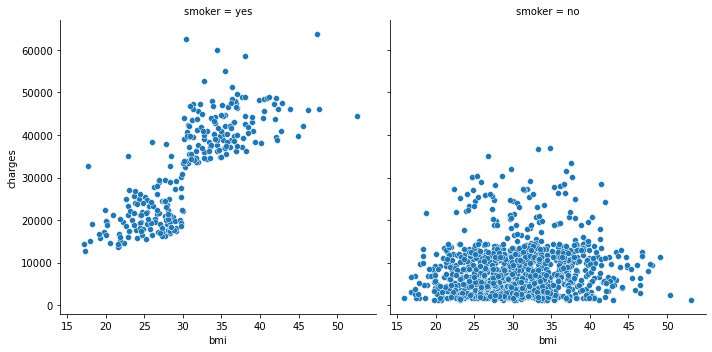

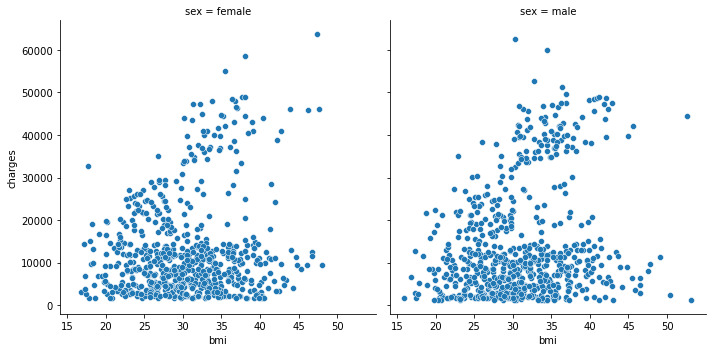

In [4]:
# Membuat scatter plot antara BMI dengan tagihan kesehatan
sns.scatterplot(data=data_insurance, x="bmi", y="charges")

# Membuat relplot antara BMI dengan tagihan kesehatan berdasarkan perokok atau non perokok
sns.relplot(data=data_insurance, x="bmi", y="charges", col="smoker", kind="scatter")

# Membuat relplot antara BMI dengan tagihan kesehatan berdasarkan jenis kelamin
sns.relplot(data=data_insurance, x="bmi", y="charges", col="sex", kind="scatter")

In [5]:
# Mencari nilai koefisien korelasi antara BMI dan tagihan pada perokok

data_smoker[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.806481
charges,0.806481,1.000000


In [6]:
# Mencari nilai koefisien korelasi antara BMI dan tagihan pada semua pengguna asuransi

data_insurance[['bmi','charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


In [7]:
# Uji independensi antara BMI dan tagihan kesehatan dengan Chi-squared
# H0 : Variabel BMI dan tagihan kesehatan bersifat independen
# H1 : Variabel BMI dan tagihan kesehatan tidak independen

crosstab_bmi_vs_charges = pd.crosstab(data_insurance['charges_category'], data_insurance['bmi_category'])
print(crosstab_bmi_vs_charges)

stats.chi2_contingency(crosstab_bmi_vs_charges)

bmi_category      normal  over
charges_category              
normal               196   808
high                  51   283


(2.7349982633726486,
 0.09817160806747607,
 1,
 array([[185.34230194, 818.65769806],
        [ 61.65769806, 272.34230194]]))

In [8]:
# Uji independensi antara status merokok dan tagihan kesehatan dengan Chi-squared
# H0 : Variabel status merokok dan tagihan kesehatan bersifat independen
# H1 : Variabel status merokok dan tagihan kesehatan tidak independen

crosstab_smoker_vs_charges = pd.crosstab(data_insurance['charges_category'], data_insurance['smoker'])
print(crosstab_smoker_vs_charges)

stats.chi2_contingency(crosstab_smoker_vs_charges)

smoker             no  yes
charges_category          
normal            984   20
high               80  254


(839.4987042363981,
 1.3950405920980632e-184,
 1,
 array([[798.39760837, 205.60239163],
        [265.60239163,  68.39760837]]))